# import library

In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn import preprocessing
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, log_loss, plot_roc_curve, auc, precision_recall_curve
from sklearn.model_selection import RandomizedSearchCV
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import classification_report
from plot_metric.functions import BinaryClassification
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", color_codes=True)
sns.set_style('ticks')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# import datasets

In [2]:
train = pd.read_csv('aug_train.csv')
test = pd.read_csv('aug_test.csv')

# check datasets

In [3]:
print('Rows and Columns in train dataset:', train.shape)
print('Rows and Columns in test dataset:', test.shape)

Rows and Columns in train dataset: (19158, 14)
Rows and Columns in test dataset: (2129, 13)


In [4]:
train.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0


In [5]:
train.describe(include='all')

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
count,19158.000000,19158,19158.000000,14650,19158,18772,18698,16345,19093,13220,13018,18735,19158.000000,19158.000000
unique,NaN,123,NaN,3,2,3,5,6,22,8,6,6,NaN,NaN
top,NaN,city_103,NaN,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,NaN,NaN
freq,NaN,4355,NaN,13221,13792,13817,11598,14492,3286,3083,9817,8040,NaN,NaN
mean,16875.358179,NaN,0.828848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.366896,0.249348
std,9616.292592,NaN,0.123362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.058462,0.432647
min,1.000000,NaN,0.448000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000
25%,8554.250000,NaN,0.740000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,0.000000
50%,16982.500000,NaN,0.903000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.000000,0.000000
75%,25169.750000,NaN,0.920000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.000000,0.000000


In [6]:
train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [7]:
test.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [9]:
print('Missing value in train dataset:', sum(train.isnull().sum()))
print('Missing value in test dataset:', sum(test.isnull().sum()))

Missing value in train dataset: 20733
Missing value in test dataset: 2204


# feature engineering

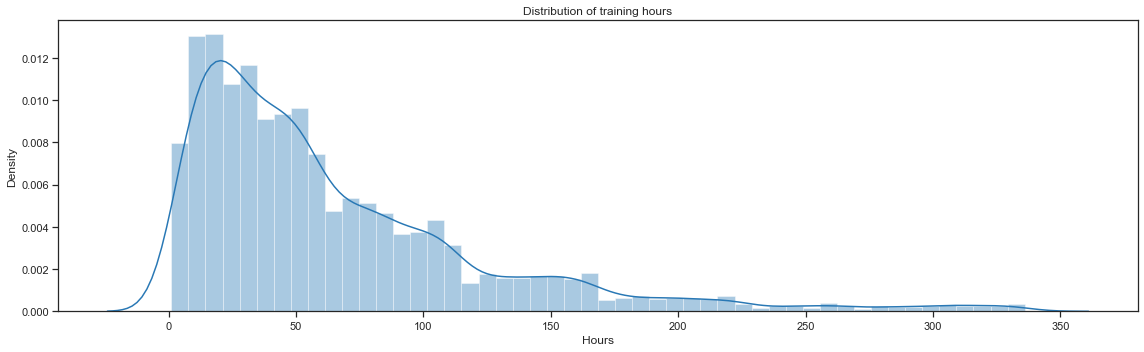

In [10]:
plt.figure(figsize=(16, 5))
sns.distplot(train.training_hours, color='#2978b5')
plt.title('Distribution of training hours')
plt.xlabel('Hours', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.tight_layout()
plt.show()

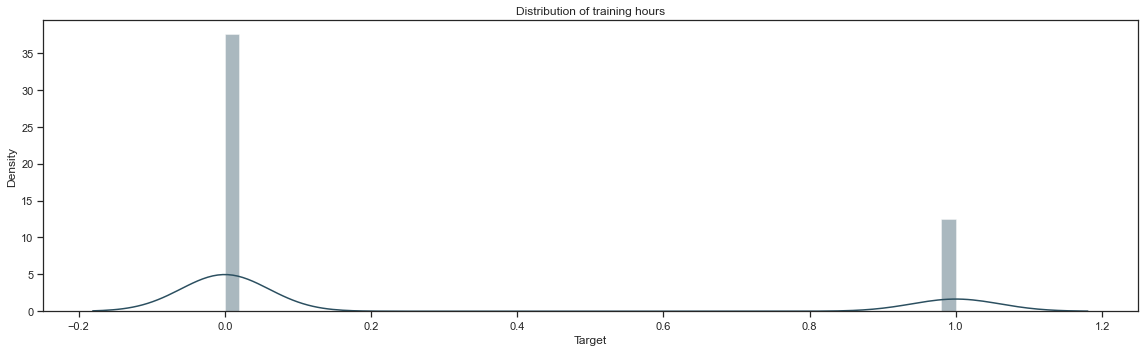

In [11]:
plt.figure(figsize=(16, 5))
sns.distplot(train.target, color='#2b4f60')
plt.title('Distribution of training hours')
plt.xlabel('Target', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.tight_layout()
plt.show()

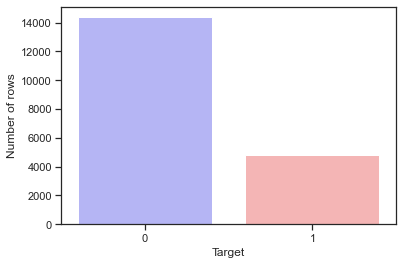

In [12]:
plt.figure(figsize=(6, 4))
sns.barplot(train.target.value_counts().index.astype(int),
            train.target.value_counts().values, palette='bwr')
plt.ylabel('Number of rows', fontsize=12)
plt.xlabel('Target', fontsize=12)
plt.show();

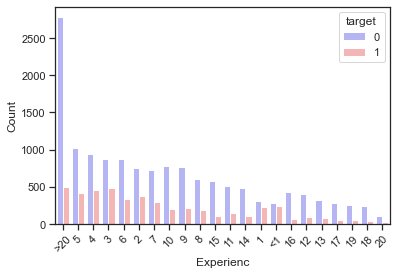

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(train.experience, palette='bwr', hue=train.target.astype(int),
              order=train.experience.value_counts().index)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Experienc', fontsize=12)
plt.xticks(rotation=45)
plt.show();

In [14]:
train['experience'].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [15]:
def expr(x):    
    if x=='<1' :
        return '<1'
    elif x in ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'] :
        return '1-10'
    elif x in ['11', '12', '13', '14', '15', '16', '17', '18', '19', '20'] :
        return '11-20'
    elif x == '>20' :
        return '>20'
train_experince = train.copy()
train_experince['experience'] = train_experince['experience'].apply(expr)    

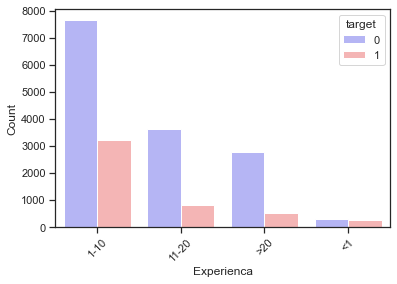

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(train_experince.experience, palette='bwr', hue=train.target.astype(int),
              order=train_experince.experience.value_counts().index)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Experienca', fontsize=12)
plt.xticks(rotation=45)
plt.show();

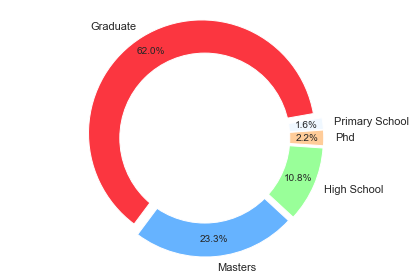

In [17]:
#pie chart
labels = train.education_level.value_counts().keys()
sizes = train.education_level.value_counts()

#add colors
colors = ['#fb3640', '#66b3ff', '#99ff99', '#ffcc99', '#f0f8ff']

#explsion
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=10, pctdistance=0.85, explode=explode,
        labeldistance=1.1)

centre_circle = plt.Circle((0, 0), 0.75, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

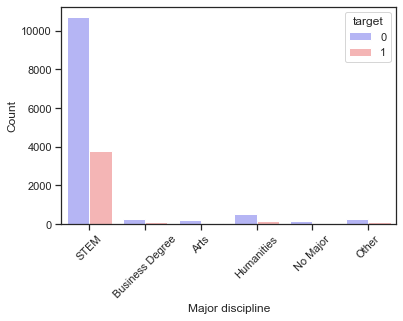

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(train.major_discipline, palette='bwr', hue=train.target.astype(int))
plt.ylabel('Count', fontsize=12)
plt.xlabel('Major discipline', fontsize=12)
plt.xticks(rotation=45)
plt.show();

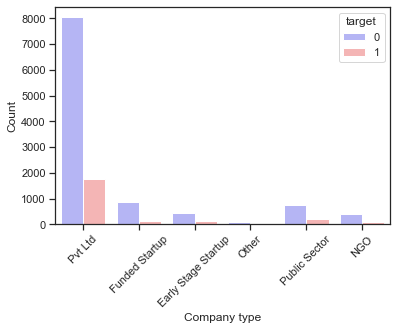

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(train.company_type, palette='bwr', hue=train.target.astype(int))
plt.ylabel('Count', fontsize=12)
plt.xlabel('Company type', fontsize=12)
plt.xticks(rotation=45)
plt.show();

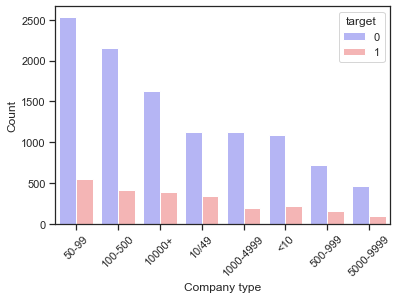

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(train.company_size, palette='bwr',
              hue=train.target.astype(int),
              order=train.company_size.value_counts().index)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Company type', fontsize=12)
plt.xticks(rotation=45)
plt.show();

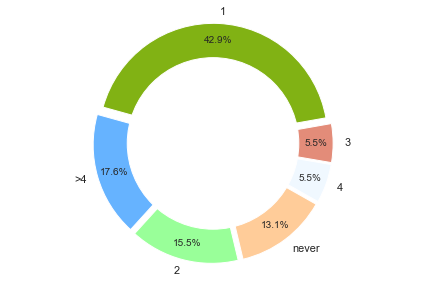

In [21]:

# pie chart

labels = train.last_new_job.value_counts().keys()
sizes = train.last_new_job.value_counts()

#add colors
colors = ['#81b214', '#66b3ff', '#99ff99', '#ffcc99', '#f0f8ff', '#E38C79']

#explsion
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=10, pctdistance=0.85, explode=explode,
        labeldistance=1.1)

centre_circle = plt.Circle((0, 0), 0.75, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

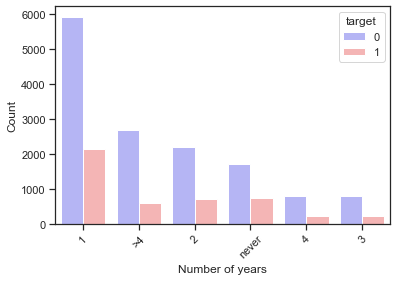

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(train.last_new_job, palette='bwr',
              hue=train.target.astype(int),
              order=train.last_new_job.value_counts().index)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Number of years', fontsize=12)
plt.xticks(rotation=45)
plt.show();

In [23]:
train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [24]:
train = train.drop(['enrollee_id', 'city', 'city_development_index', 'training_hours'], axis=1)
test = test.drop(['enrollee_id', 'city', 'city_development_index', 'training_hours'], axis=1)

train.experience = train.experience.apply(expr)
test.experience = test.experience.apply(expr)

In [25]:
print('Train NA values: \n', train.isnull().sum())
print('Test NA values: \n', test.isnull().sum())

Train NA values: 
 gender                 4508
relevent_experience       0
enrolled_university     386
education_level         460
major_discipline       2813
experience               65
company_size           5938
company_type           6140
last_new_job            423
target                    0
dtype: int64
Test NA values: 
 gender                 508
relevent_experience      0
enrolled_university     31
education_level         52
major_discipline       312
experience               5
company_size           622
company_type           634
last_new_job            40
dtype: int64


# issue in accuracy, what one of solution is to drop null values

In [26]:
train.dropna(inplace=True)
test.dropna(inplace=True)

In [27]:
print('Train NA values: \n', train.isnull().sum())
print('Test NA values: \n', test.isnull().sum())

Train NA values: 
 gender                 0
relevent_experience    0
enrolled_university    0
education_level        0
major_discipline       0
experience             0
company_size           0
company_type           0
last_new_job           0
target                 0
dtype: int64
Test NA values: 
 gender                 0
relevent_experience    0
enrolled_university    0
education_level        0
major_discipline       0
experience             0
company_size           0
company_type           0
last_new_job           0
dtype: int64


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8955 entries, 1 to 19155
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               8955 non-null   object 
 1   relevent_experience  8955 non-null   object 
 2   enrolled_university  8955 non-null   object 
 3   education_level      8955 non-null   object 
 4   major_discipline     8955 non-null   object 
 5   experience           8955 non-null   object 
 6   company_size         8955 non-null   object 
 7   company_type         8955 non-null   object 
 8   last_new_job         8955 non-null   object 
 9   target               8955 non-null   float64
dtypes: float64(1), object(9)
memory usage: 769.6+ KB


In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019 entries, 3 to 2128
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   gender               1019 non-null   object
 1   relevent_experience  1019 non-null   object
 2   enrolled_university  1019 non-null   object
 3   education_level      1019 non-null   object
 4   major_discipline     1019 non-null   object
 5   experience           1019 non-null   object
 6   company_size         1019 non-null   object
 7   company_type         1019 non-null   object
 8   last_new_job         1019 non-null   object
dtypes: object(9)
memory usage: 79.6+ KB


In [30]:
objList = train.select_dtypes(include = "object").columns
print('Categorical columns: ', objList)

Categorical columns:  Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')


# variabel kategorikal -> dilakukan encoding

In [31]:
le = preprocessing.LabelEncoder()
train_encoded = train.copy()
test_encoded = test.copy()
for feat in objList:
    train_encoded[feat] = le.fit_transform(train[feat].astype(str))
    test_encoded[feat] = le.fit_transform(test[feat].astype(str))

In [32]:
train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8955 entries, 1 to 19155
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               8955 non-null   int32  
 1   relevent_experience  8955 non-null   int32  
 2   enrolled_university  8955 non-null   int32  
 3   education_level      8955 non-null   int32  
 4   major_discipline     8955 non-null   int32  
 5   experience           8955 non-null   int32  
 6   company_size         8955 non-null   int32  
 7   company_type         8955 non-null   int32  
 8   last_new_job         8955 non-null   int32  
 9   target               8955 non-null   float64
dtypes: float64(1), int32(9)
memory usage: 454.7 KB


In [33]:
test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019 entries, 3 to 2128
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   gender               1019 non-null   int32
 1   relevent_experience  1019 non-null   int32
 2   enrolled_university  1019 non-null   int32
 3   education_level      1019 non-null   int32
 4   major_discipline     1019 non-null   int32
 5   experience           1019 non-null   int32
 6   company_size         1019 non-null   int32
 7   company_type         1019 non-null   int32
 8   last_new_job         1019 non-null   int32
dtypes: int32(9)
memory usage: 43.8 KB


In [34]:
X = train_encoded.drop('target', axis=1)
y = train_encoded.target

# sampling

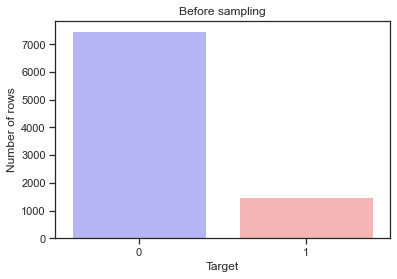

In [35]:
plt.figure(figsize=(6, 4))
sns.barplot(y.value_counts().index.astype(int),
            y.value_counts().values, palette='bwr')
plt.ylabel('Number of rows', fontsize=12)
plt.xlabel('Target', fontsize=12)
plt.title('Before sampling')
plt.show()

In [36]:
nm = NearMiss(version=2, n_neighbors=3)
X_nm, y_nm = nm.fit_resample(X,y)

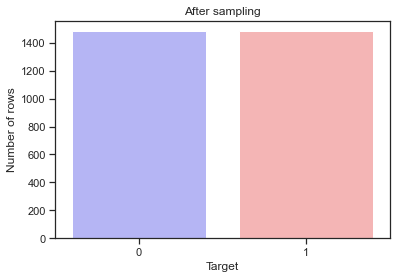

In [37]:
plt.figure(figsize=(6, 4))
sns.barplot(y_nm.value_counts().index.astype(int),
            y_nm.value_counts().values, palette='bwr')
plt.ylabel('Number of rows', fontsize=12)
plt.xlabel('Target', fontsize=12)
plt.title('After sampling')
plt.show()

# feature importance and modeling

In [38]:
from sklearn.feature_selection import SelectKBest, f_classif

bestfeatures = SelectKBest(score_func=f_classif, k=9)
fit = bestfeatures.fit(X_nm,y_nm)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                 Specs       Score
6         company_size  166.199890
2  enrolled_university   57.591228
8         last_new_job   41.079079
4     major_discipline   25.136705
5           experience   19.697529
1  relevent_experience   14.528711
3      education_level    0.453493
0               gender    0.092814
7         company_type    0.031064


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_nm,
                                                    y_nm,
                                                    test_size=0.2,
                                                    random_state=42)

In [40]:
rf_pipe = Pipeline(steps =[ ('scale',StandardScaler()), ("RF",RandomForestClassifier(random_state=42)) ])
ada_pipe = Pipeline(steps =[ ('scale',StandardScaler()), ("RF",AdaBoostClassifier(random_state=42,learning_rate=0.7)) ])
xgb_pipe = Pipeline(steps =[ ('scale',StandardScaler()), ("RF",XGBClassifier(random_state=42, n_jobs = 2)) ])

rf_roc_auc_cross_val_scores = cross_val_score(rf_pipe,X_train,y_train,cv=5,scoring='roc_auc')
ada_roc_auc_cross_val_scores=cross_val_score(ada_pipe,X_train,y_train,cv=5,scoring='roc_auc')
xgb_roc_auc_cross_val_scores=cross_val_score(xgb_pipe,X_train,y_train,cv=5,scoring='roc_auc')

[05:44:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:44:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:44:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:44:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [42]:
print('Rndmforest validation score: ', rf_roc_auc_cross_val_scores.max())
print('Ada validation score: ', ada_roc_auc_cross_val_scores.max())
print('Xgb validation score: ', xgb_roc_auc_cross_val_scores.max())

Rndmforest validation score:  0.9050035612535613
Ada validation score:  0.8969769503546099
Xgb validation score:  0.9098404255319148


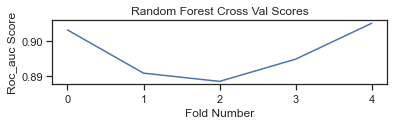

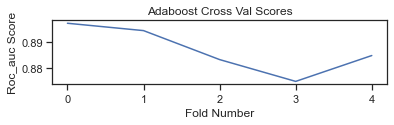

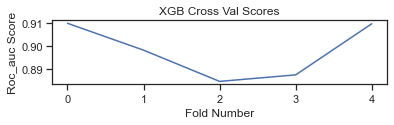

In [44]:
plt.subplot(3,1,1)
ax = sns.lineplot(x=range(0,len(rf_roc_auc_cross_val_scores)),y=rf_roc_auc_cross_val_scores)
ax.set_title('Random Forest Cross Val Scores')
ax.set_xticks([i for i in range(0,len(rf_roc_auc_cross_val_scores))])
ax.set_xlabel('Fold Number')
ax.set_ylabel('Roc_auc Score')
plt.show()

plt.subplot(3,1,2)
ax = sns.lineplot(x=range(0,len(ada_roc_auc_cross_val_scores)),y=ada_roc_auc_cross_val_scores)
ax.set_title('Adaboost Cross Val Scores')
ax.set_xticks([i for i in range(0,len(ada_roc_auc_cross_val_scores))])
ax.set_xlabel('Fold Number')
ax.set_ylabel('Roc_auc Score')
plt.show()

plt.subplot(3,1,3)
ax = sns.lineplot(x=range(0,len(xgb_roc_auc_cross_val_scores)),y=xgb_roc_auc_cross_val_scores)
ax.set_title('XGB Cross Val Scores')
ax.set_xticks([i for i in range(0,len(xgb_roc_auc_cross_val_scores))])
ax.set_xlabel('Fold Number')
ax.set_ylabel('Roc_auc Score')
plt.show()

In [45]:
rf_pipe.fit(X_train, y_train)
rf_prediction = rf_pipe.predict(X_test)

ada_pipe.fit(X_train, y_train)
ada_prediction = ada_pipe.predict(X_test)

xgb_pipe.fit(X_train, y_train)
xgb_prediction = xgb_pipe.predict(X_test)

print('Roc_auc Score of Random Forest Model On Test Set - {}'.format(roc_auc_score(rf_prediction, y_test)))
print('Roc_auc Score of AdaBoost Model On Test Set - {}'.format(roc_auc_score(ada_prediction, y_test)))
print('Roc_auc Score of XGB Model On Test Set - {}'.format(roc_auc_score(xgb_prediction, y_test)))

[05:45:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Roc_auc Score of Random Forest Model On Test Set - 0.8767364348312512
Roc_auc Score of AdaBoost Model On Test Set - 0.8680181507454771
Roc_auc Score of XGB Model On Test Set - 0.8846520047488627


In [46]:
print(classification_report(y_test, xgb_prediction, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       311
           1       0.93      0.80      0.86       283

    accuracy                           0.88       594
   macro avg       0.88      0.87      0.87       594
weighted avg       0.88      0.88      0.87       594



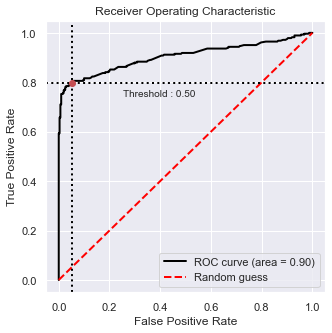

In [47]:
y_pred_prob = xgb_pipe.predict_proba(X_test)[:,1]
bc = BinaryClassification(y_test, y_pred_prob, labels=[0, 1])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

# saving model

In [48]:
Pkl_Filename = "Pickle_Model_tugas.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(xgb_pipe, file)